<a href="https://colab.research.google.com/github/andysingal/deep-learning/blob/main/MNIST_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementing MLPs with Keras
Building an Image Classifier Using the Sequential API
Using Keras to load the dataset
Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in tf.keras.datasets. The dataset is already split for you between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. We'll use 55,000 images for training, and 5,000 for validation.

In [13]:
import tensorflow as tf
import numpy as np 
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [3]:
X_train.shape,  X_train.dtype

((55000, 28, 28), dtype('uint8'))

In [4]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255

In [5]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


#Dense layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data. 

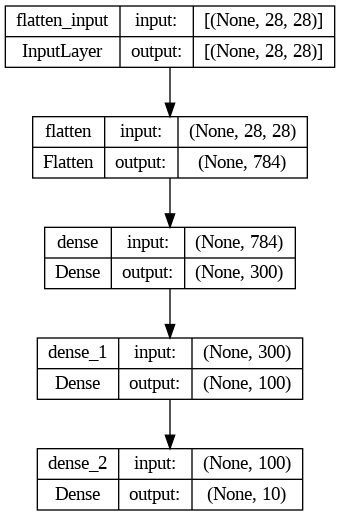

In [7]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [9]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [10]:
weights, biases = hidden1.get_weights()
weights

array([[-0.00587495, -0.00681989,  0.00775848, ...,  0.06984903,
         0.02365371,  0.03477456],
       [-0.04638726,  0.0364475 , -0.02218065, ...,  0.06002158,
         0.05620706, -0.0177605 ],
       [ 0.05908278, -0.00707164, -0.03995961, ..., -0.04905558,
        -0.00196812, -0.07053612],
       ...,
       [-0.01056896,  0.0054194 ,  0.02211449, ...,  0.0605385 ,
        -0.06754106,  0.0246128 ],
       [ 0.07124294,  0.02216434, -0.02621087, ...,  0.01774281,
         0.05261102, -0.05284373],
       [ 0.04870052, -0.01515987, -0.04323639, ...,  0.07017229,
         0.00334109,  0.0532303 ]], dtype=float32)

**If you want to use a different initialization method, you can set kernel_initializer (kernel is another name for the matrix of connection weights) or bias_initializer when creating the layer.**

#Compiling the model

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 5ms/step - loss: 0.7170 - accuracy: 0.7653 - val_loss: 0.4987 - val_accuracy: 0.8290
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4873 - accuracy: 0.8301 - val_loss: 0.4692 - val_accuracy: 0.8304
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4422 - accuracy: 0.8440 - val_loss: 0.4254 - val_accuracy: 0.8482
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4178 - accuracy: 0.8532 - val_loss: 0.3969 - val_accuracy: 0.8590
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3969 - accuracy: 0.8607 - val_loss: 0.3927 - val_accuracy: 0.8614
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3805 - accuracy: 0.8659 - val_loss: 0.3982 - val_accuracy: 0.8606
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3677 - accuracy: 0.8698 - val_loss: 0.3736 - val_accuracy

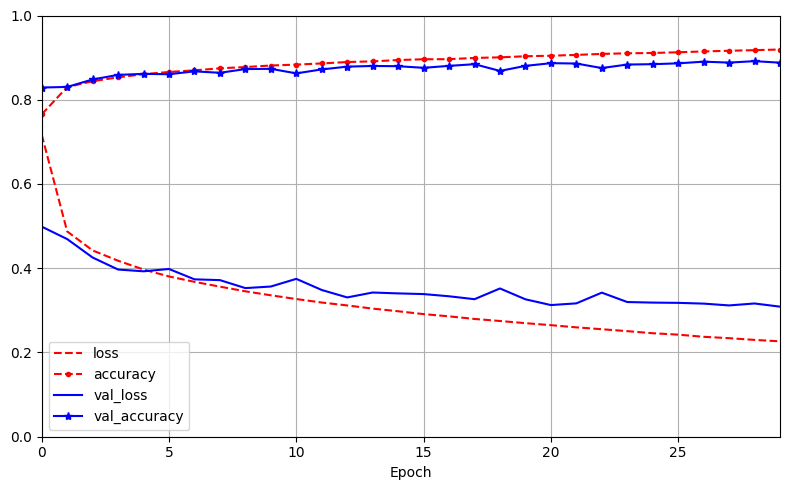

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
save_fig("keras_learning_curves_plot")  # extra code
plt.show()

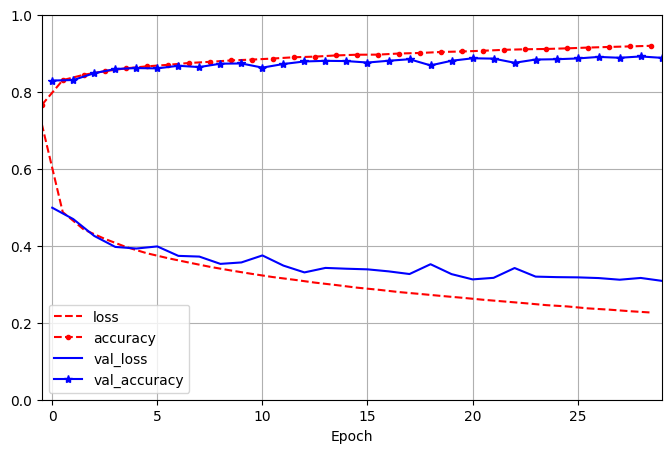

In [15]:
# extra code – shows how to shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 58.9397 - accuracy: 0.8530


[58.93970489501953, 0.8529999852180481]

#Using the model to make predictions

In [17]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 85ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

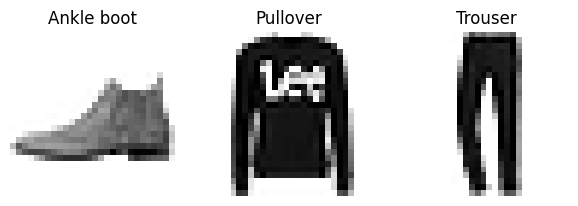

In [20]:
# extra code – this cell generates and saves Figure 10–12
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()